In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Just so I can see entire dataframes
pd.options.display.width = 0

In [3]:
# Set global matplotlib styles
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.1
plt.rcParams['axes.formatter.limits'] = (-5, 5)

# Ensure seaborn plots follow the same style
sns.set_context("notebook", font_scale=1.2)
sns.set_style("whitegrid", {
    'grid.linestyle': '--',
    'grid.color': 'gray',
    'axes.grid': True
})


In [4]:
# Read data
raw_data = pd.read_csv('data/genre_dataset.csv')

In [5]:
# Extract features we care about
rel_data = raw_data[['danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 
                     'tempo', 'duration_ms', 'genre']]

In [6]:
rel_data

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0.697,0.401,-10.216,0.0543,0.430000,0.01090,0.3160,0.4780,108.996,185224,indie pop
1,0.724,0.728,-7.938,0.0796,0.228000,0.10100,0.2820,0.1750,122.984,256573,indie pop
2,0.575,0.446,-7.802,0.0296,0.247000,0.00567,0.1370,0.2590,68.985,262540,indie pop
3,0.705,0.373,-9.066,0.0384,0.723000,0.81000,0.2890,0.5510,120.046,208026,indie pop
4,0.725,0.446,-8.958,0.0287,0.850000,0.24300,0.1070,0.3110,90.024,187333,indie pop
...,...,...,...,...,...,...,...,...,...,...,...
4995,0.697,0.838,-12.202,0.0911,0.026400,0.86500,0.0874,0.1340,159.897,387792,techno
4996,0.723,0.672,-10.120,0.0964,0.067500,0.94300,0.1100,0.0754,126.976,378002,techno
4997,0.682,0.768,-5.566,0.0741,0.000052,0.88200,0.0426,0.7390,150.012,312000,techno
4998,0.647,0.757,-12.955,0.0475,0.001810,0.89000,0.1110,0.3930,131.999,341500,techno


In [7]:
# Any missing values for any reason?
rel_data.isnull().sum().sum()

0

# Exploratory Analysis

### Distribution Analysis

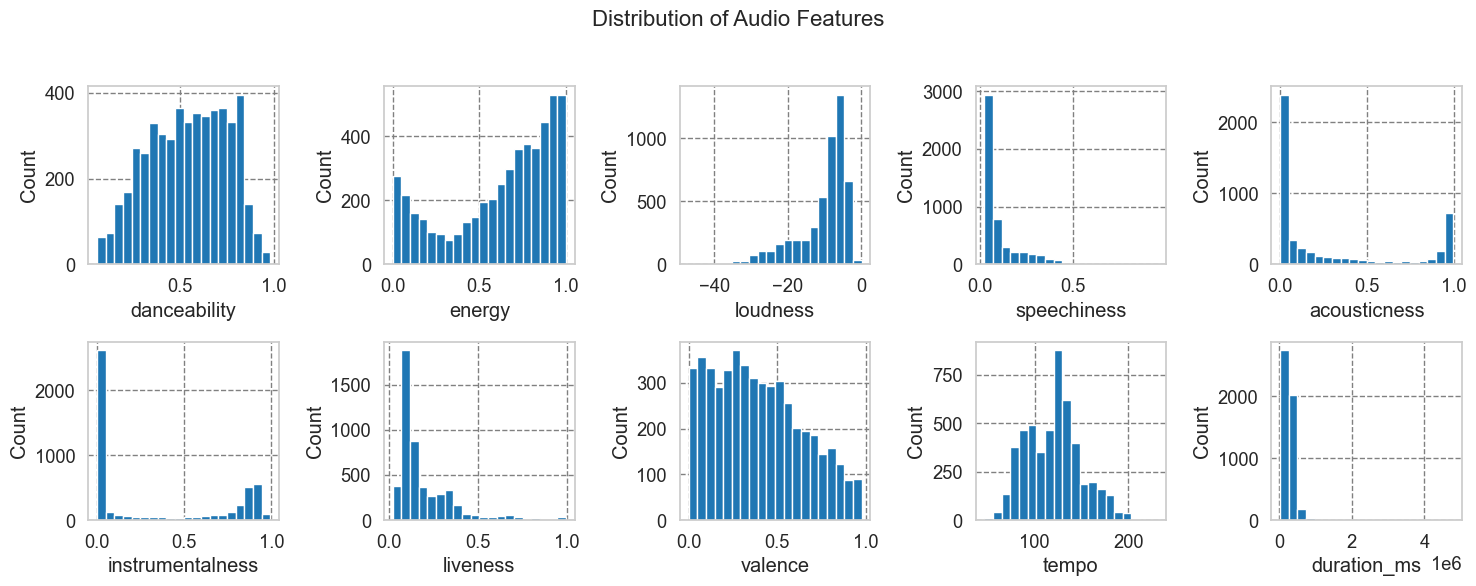

In [60]:
# Audio feature distributions
axes = rel_data.drop('genre', axis=1).hist(bins=20, figsize=(15, 6), layout=(2, 5), grid=True)

for ax in axes.flatten():
    ax.set_xlabel(ax.get_title())
    ax.set_ylabel('Count')
    ax.set_title('')

plt.suptitle('Distribution of Audio Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to fit the main title
plt.savefig('figs/exploratory_analysis/feature_distributions.png')
plt.show()

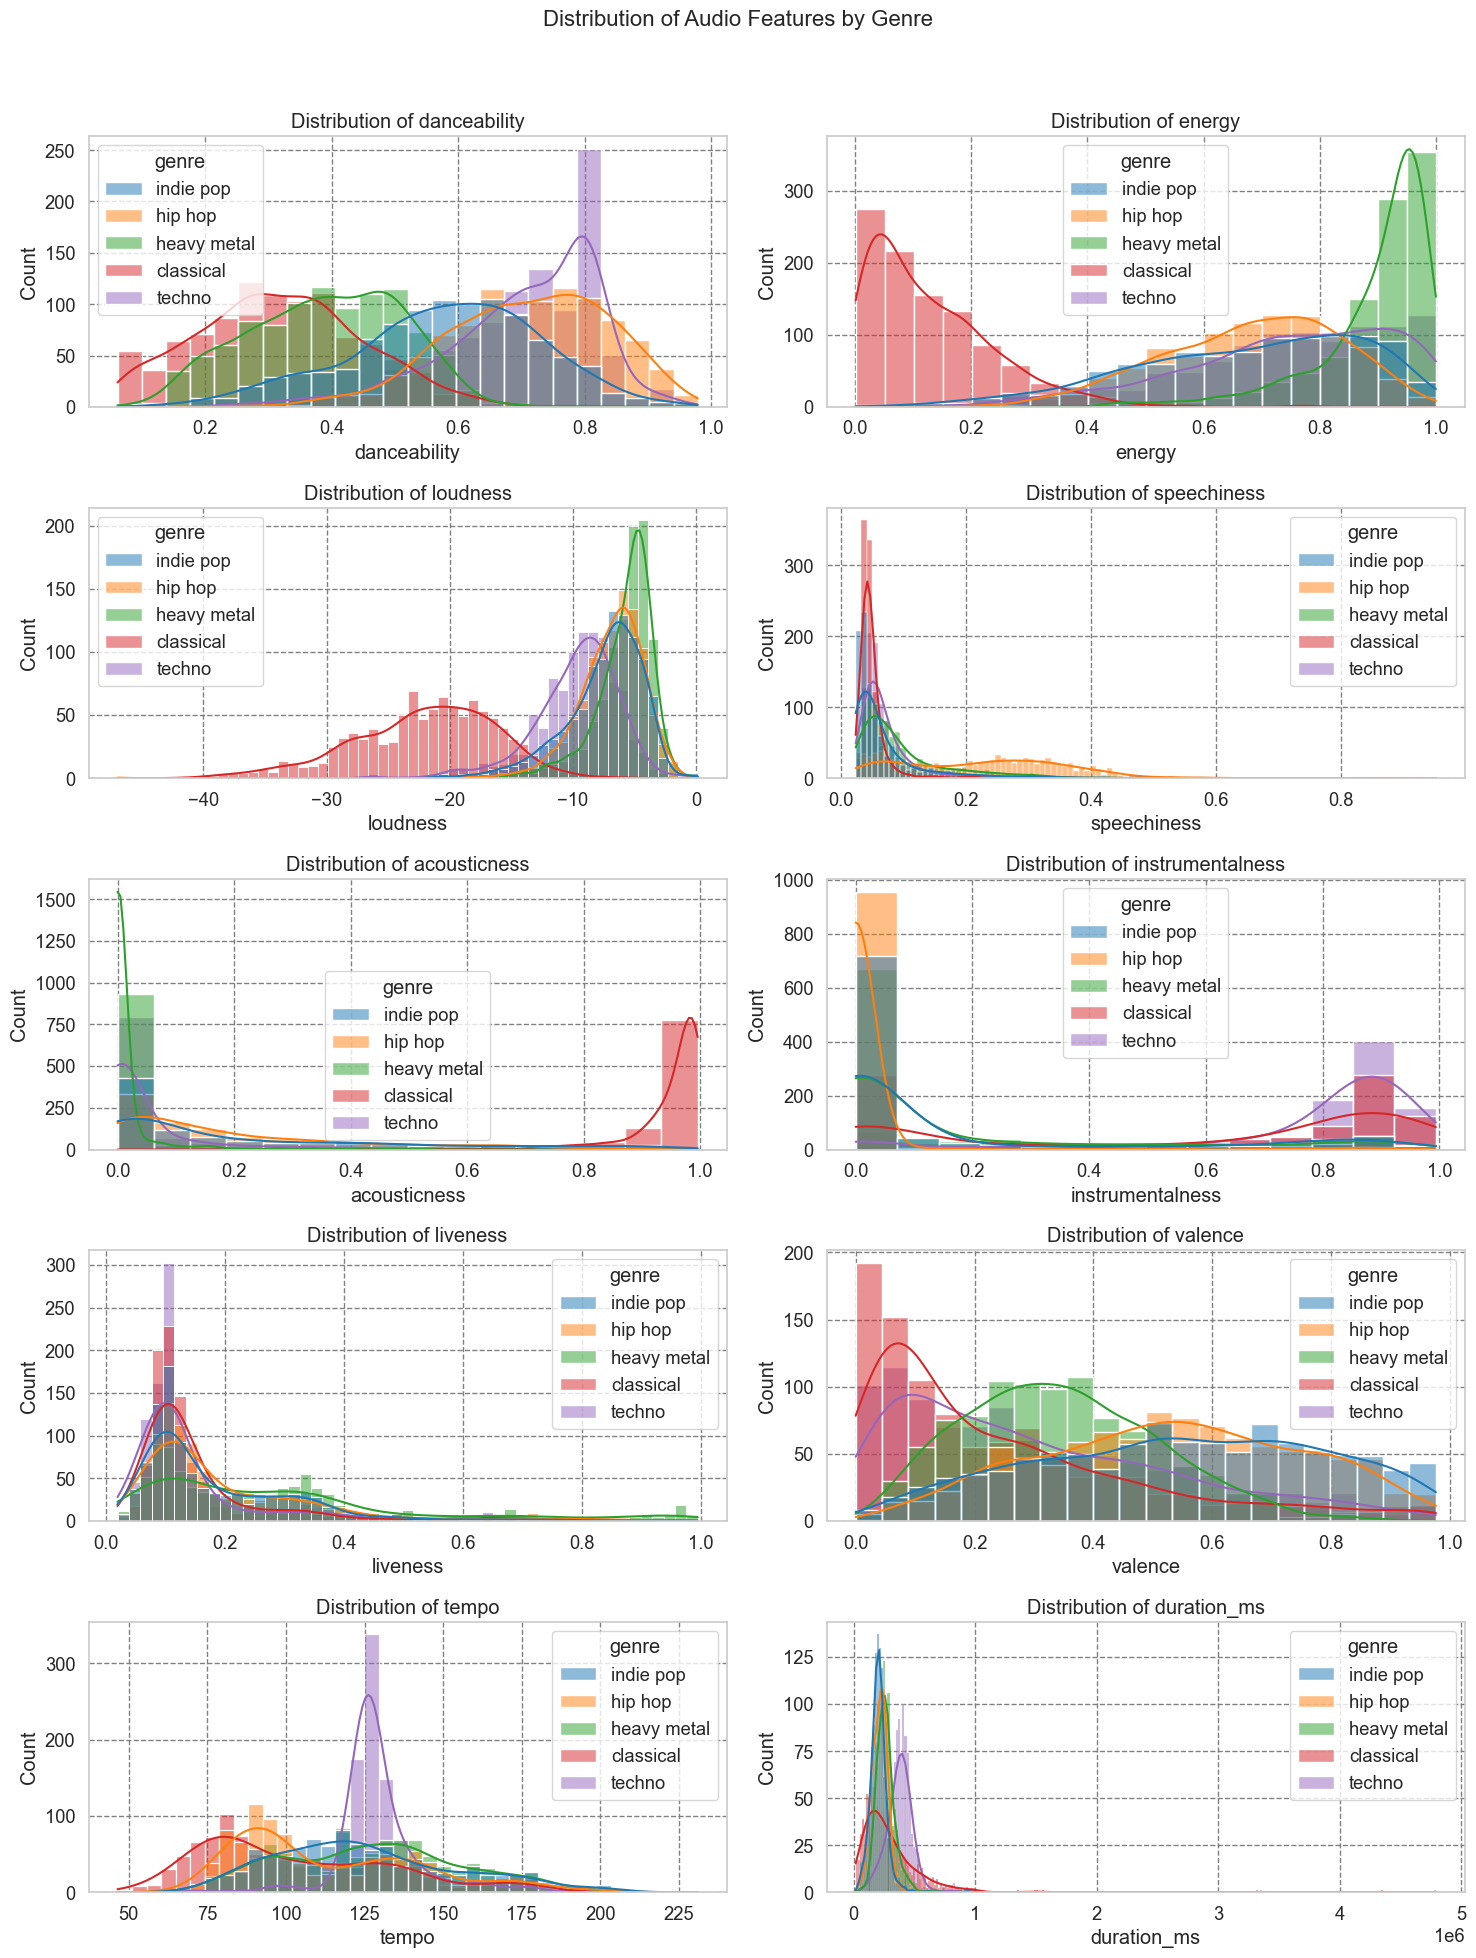

In [61]:
# Distributions by Genre
numeric_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 
                     'tempo', 'duration_ms']

fig, axes = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('Distribution of Audio Features by Genre', fontsize=16)

for i, feature in enumerate(numeric_features):
    row, col = divmod(i, 2)
    sns.histplot(data=rel_data, x=feature, hue='genre', kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to fit the main title
plt.savefig('figs/exploratory_analysis/feature_distributions_by_genre.png')
plt.show()

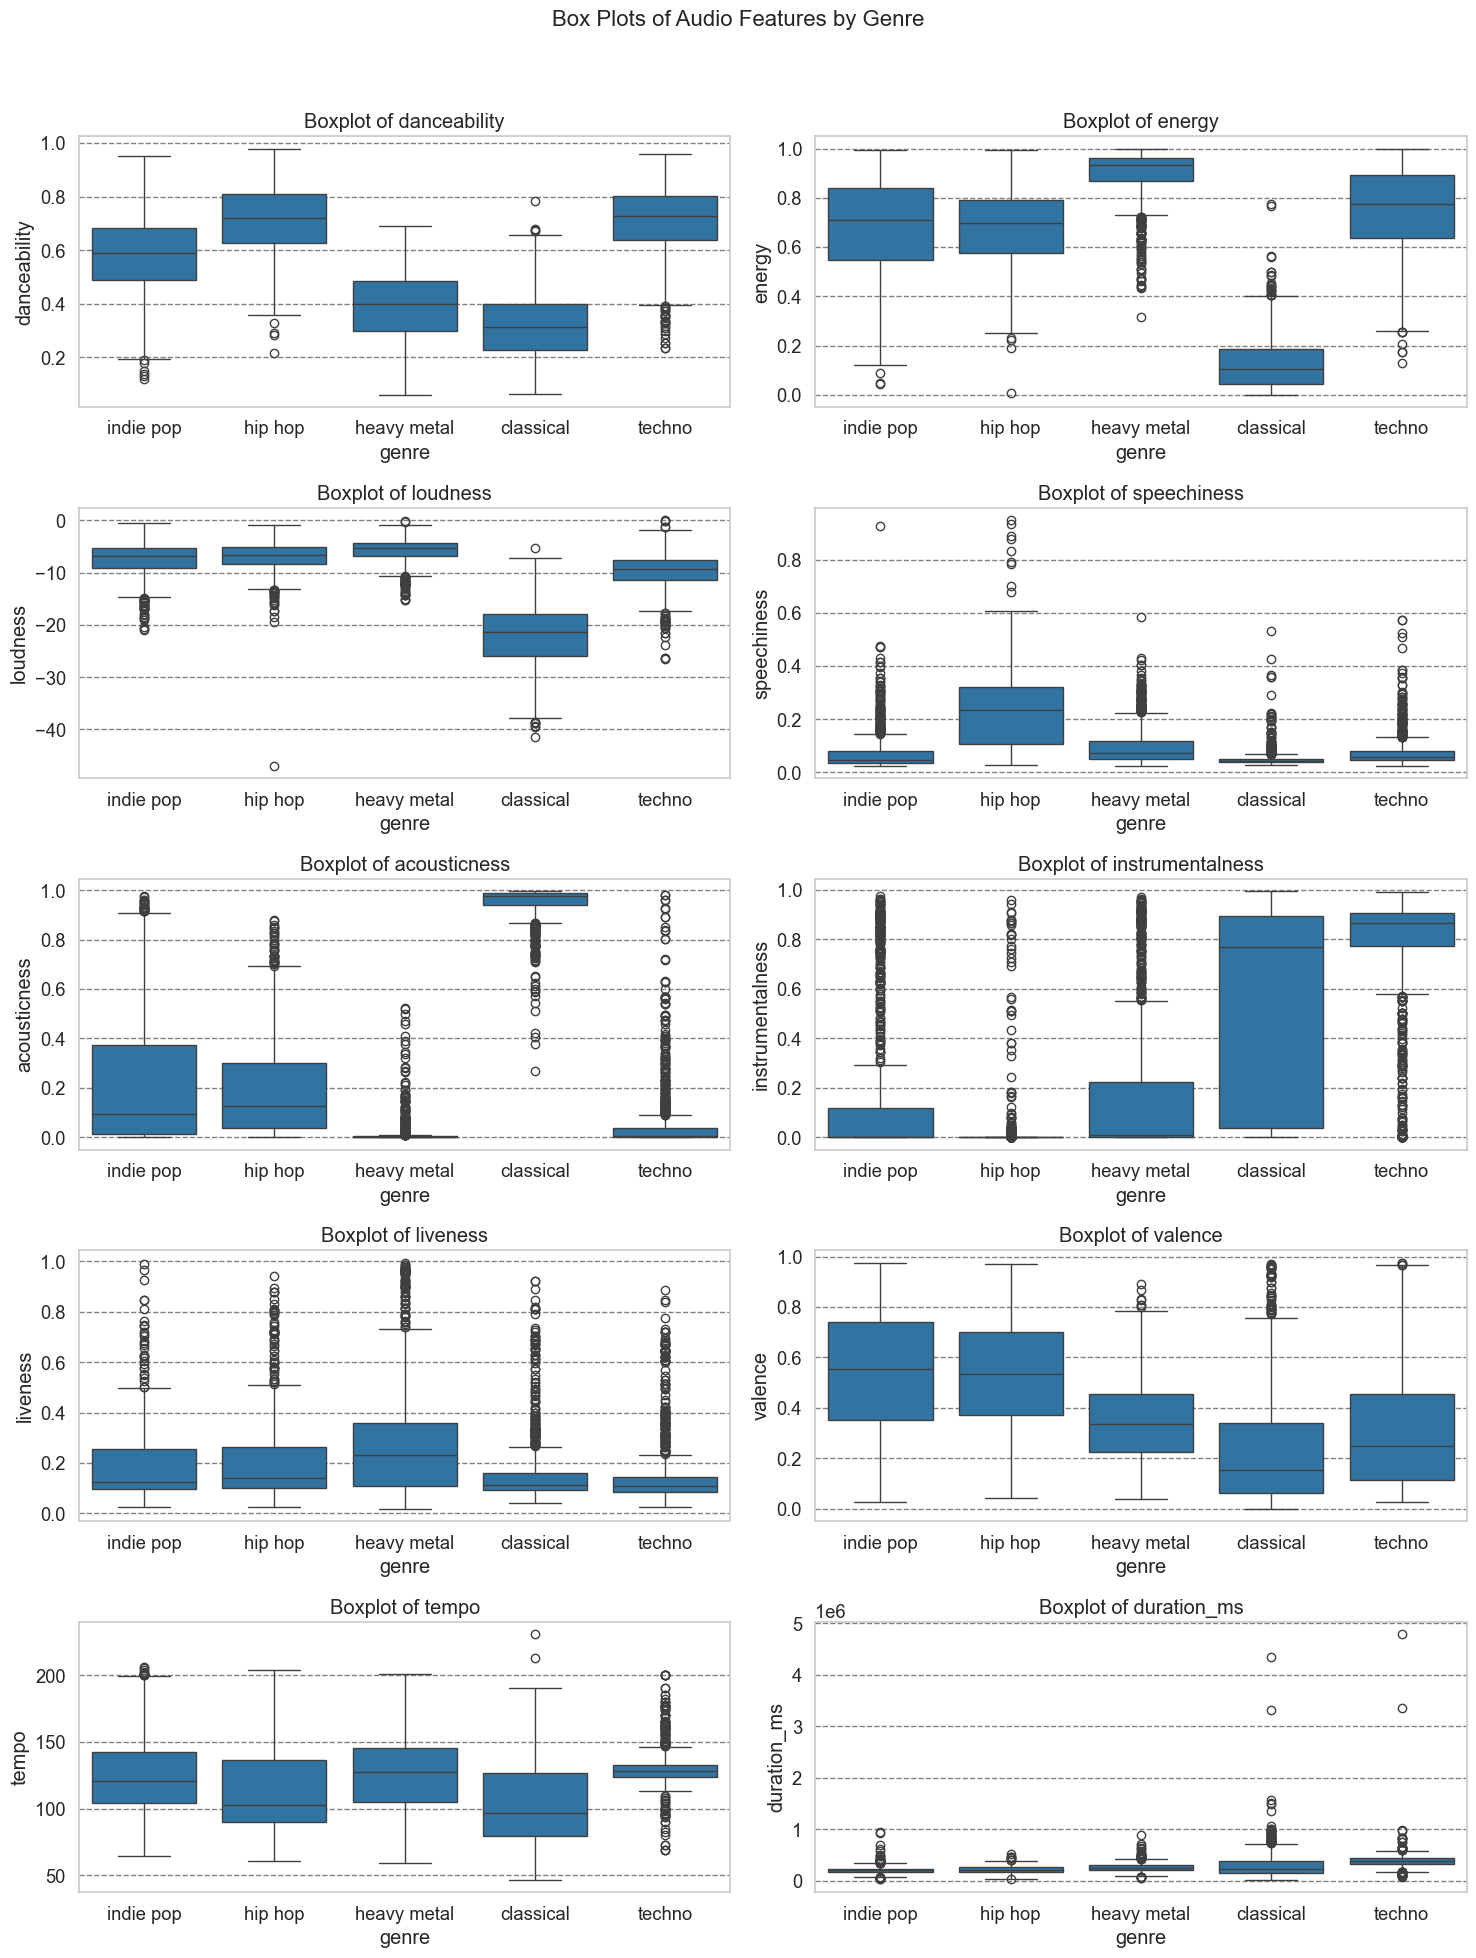

In [62]:
# Boxplots broken up by genre
numeric_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 
                     'tempo', 'duration_ms']
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle('Box Plots of Audio Features by Genre', fontsize=16)

for i, feature in enumerate(numeric_features):
    row, col = divmod(i, 2)
    sns.boxplot(x='genre', y=feature, data=rel_data, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the layout to fit the main title
plt.savefig('figs/exploratory_analysis/boxplots_by_genre.png')
plt.show()

### Correlation Analysis

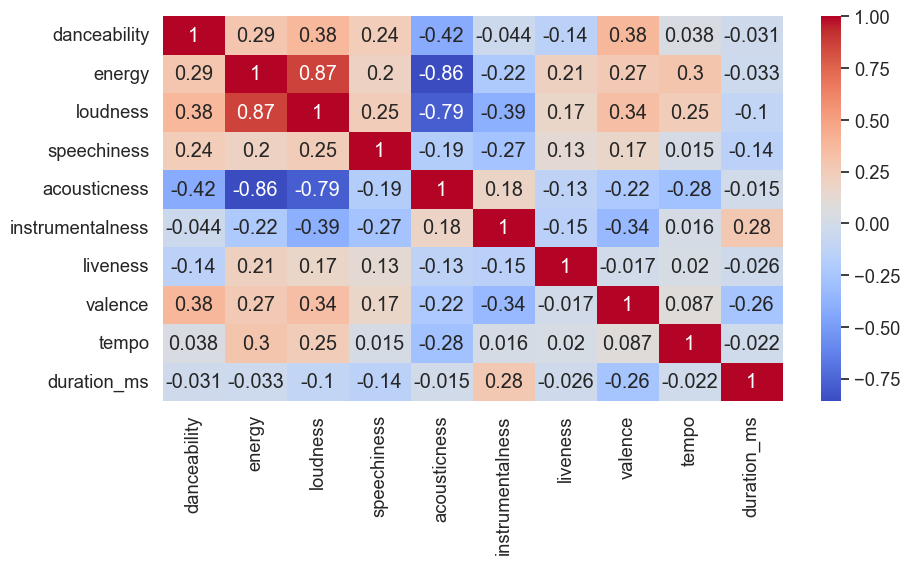

In [63]:
correlation_matrix = rel_data.drop('genre', axis=1).corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.savefig('figs/exploratory_analysis/correlations.png')
plt.show()

## PCA Visualization

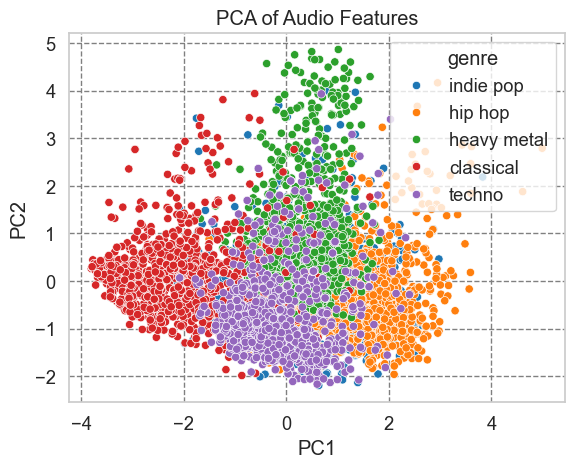

In [64]:
# 2D PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# New numeric features we care about
numeric_features = ['danceability', 'energy', 'valence', 'tempo',
                    'instrumentalness', 'liveness', 'speechiness']

features = rel_data[numeric_features]
features_scaled = StandardScaler().fit_transform(features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['genre'] = rel_data['genre']

sns.scatterplot(x='PC1', y='PC2', hue='genre', data=principal_df)
plt.title('PCA of Audio Features')
plt.savefig('figs/exploratory_analysis/2d_pca.png')
plt.show()

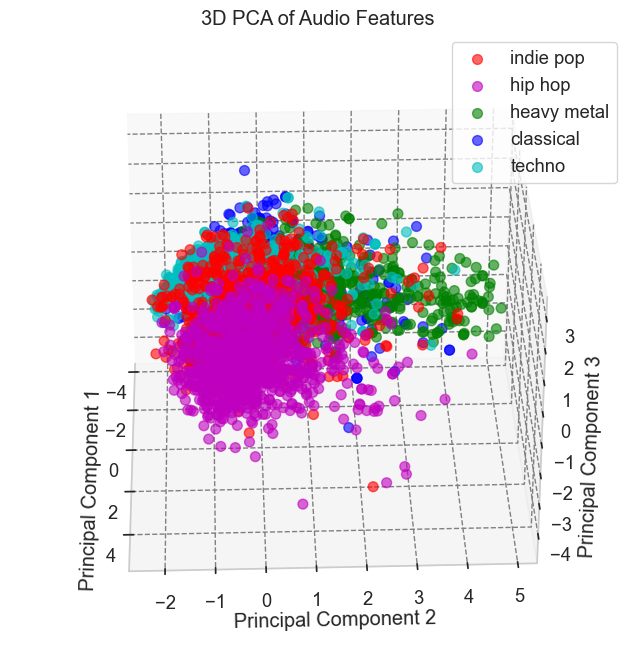

In [65]:
# 3D PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(rel_data[numeric_features])

# Apply PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(data_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
principal_df['genre'] = rel_data['genre']

# Plotting the 3D PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use different colors for each genre
colors = {'indie pop': 'r', 'heavy metal': 'g', 'classical': 'b', 'techno': 'c', 'hip hop': 'm'}

for genre in principal_df['genre'].unique():
    indices_to_keep = principal_df['genre'] == genre
    ax.scatter(principal_df.loc[indices_to_keep, 'PC1'],
               principal_df.loc[indices_to_keep, 'PC2'],
               principal_df.loc[indices_to_keep, 'PC3'],
               c=colors[genre], s=50, alpha=0.6, label=genre)

# Adding labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Audio Features')
ax.legend()

# Function to rotate the plot
def rotate(angle):
    ax.view_init(elev=30, azim=angle)

# Animate the rotation
ani = FuncAnimation(fig, rotate, frames=np.arange(0, 360, 2), interval=100)

# Save the animation as an HTML file
ani.save('figs/exploratory_analysis/3d_pca_animation.html', writer='html')

plt.show()